11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 8s 21ms/step - loss: 0.2775 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1726 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1448 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1290 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1189 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1120 - val_loss: 0.1079
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1070 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1032 - val_loss: 0.1003
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1004 - val_loss: 0.0981
Epoch 10/50
235/235 [=====

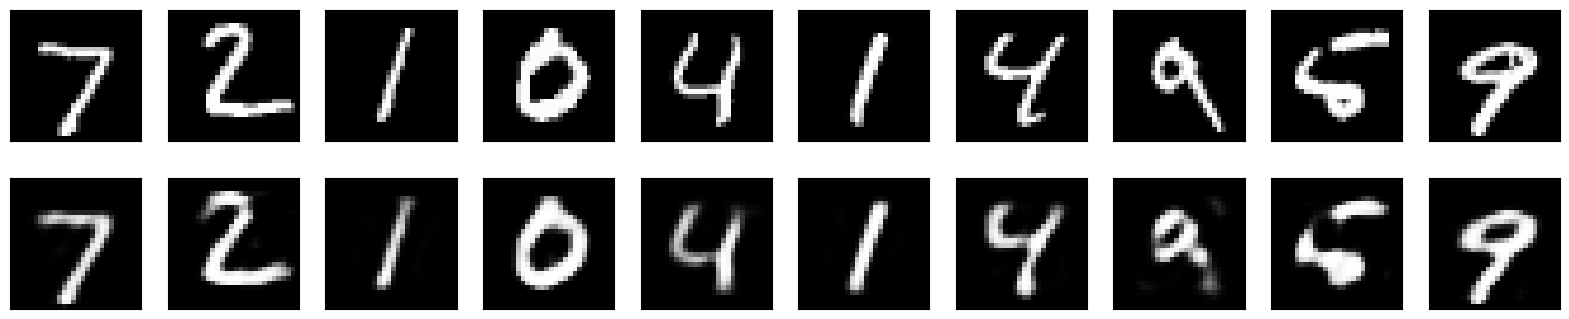

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib to plot the results
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()